# Environment Setup

In [1]:
! pip install -U imbalanced-learn
! pip install seaborn==0.11.0

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.7/site-packages (0.9.0)


In [2]:
# Essential modules for data manipulation
import pandas as pd
import numpy as np

# Custom modules to assist the commom data exploration and preparation tasks
import src.data.explore as dataexp
import src.data.prepare as dataprep
import src.data.sets as datasets

# Modules to preprocess data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# Modules to persist classes
import joblib

# Set Pandas dataframe display options
# pd.set_option('display.max_columns', None)
# pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.6f' % x)

## Set module auto reload options
%load_ext autoreload
%autoreload 2

# 1. Data Understanding

## 1.1 Collect initial data

In [3]:
# Load data set(s) into dataframe(s)
df_train, df_test = dataexp.read_csv_data('beer_reviews.csv')

## 1.2 Describe data

### 1.2.1 Display dataset information

In [4]:
# Print summary information (Index, Columnn, Non-Null values and Datatype), Shape (row count, column count) and first and last 20 rows of the dataframe
dataexp.print_info(df_train)

**********************
Dataframe Information:
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB
None

****************
Dataframe Shape:
****************
Dataframe (rows, columns):  (1586614, 13)

***************
Dataframe Data:
***************


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.500000,2.000000,2.500000,stcules,Hefeweizen,1.500000,1.500000,Sausa Weizen,5.000000,47986
1,10325,Vecchio Birraio,1235915097,3.000000,2.500000,3.000000,stcules,English Strong Ale,3.000000,3.000000,Red Moon,6.200000,48213
2,10325,Vecchio Birraio,1235916604,3.000000,2.500000,3.000000,stcules,Foreign / Export Stout,3.000000,3.000000,Black Horse Black Beer,6.500000,48215
3,10325,Vecchio Birraio,1234725145,3.000000,3.000000,3.500000,stcules,German Pilsener,2.500000,3.000000,Sausa Pils,5.000000,47969
4,1075,Caldera Brewing Company,1293735206,4.000000,4.500000,4.000000,johnmichaelsen,American Double / Imperial IPA,4.000000,4.500000,Cauldron DIPA,7.700000,64883
5,1075,Caldera Brewing Company,1325524659,3.000000,3.500000,3.500000,oline73,Herbed / Spiced Beer,3.000000,3.500000,Caldera Ginger Beer,4.700000,52159
6,1075,Caldera Brewing Company,1318991115,3.500000,3.500000,3.500000,Reidrover,Herbed / Spiced Beer,4.000000,4.000000,Caldera Ginger Beer,4.700000,52159
7,1075,Caldera Brewing Company,1306276018,3.000000,2.500000,3.500000,alpinebryant,Herbed / Spiced Beer,2.000000,3.500000,Caldera Ginger Beer,4.700000,52159
8,1075,Caldera Brewing Company,1290454503,4.000000,3.000000,3.500000,LordAdmNelson,Herbed / Spiced Beer,3.500000,4.000000,Caldera Ginger Beer,4.700000,52159
9,1075,Caldera Brewing Company,1285632924,4.500000,3.500000,5.000000,augustgarage,Herbed / Spiced Beer,4.000000,4.000000,Caldera Ginger Beer,4.700000,52159


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586594,14359,The Defiant Brewing Company,1186979266,3.000000,3.500000,4.000000,maddogruss,American Porter,4.000000,4.000000,Highland Porter,6.000000,38160
1586595,14359,The Defiant Brewing Company,1311205969,4.000000,3.500000,4.000000,JerzDevl2000,Hefeweizen,4.000000,4.000000,Baron Von Weizen,5.000000,71234
1586596,14359,The Defiant Brewing Company,1287951067,4.000000,3.000000,5.000000,hoppymcgee,Belgian Strong Pale Ale,4.000000,3.500000,Resolution #2,nan,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.500000,4.500000,4.000000,WesWes,Belgian Strong Pale Ale,4.000000,4.000000,Resolution #2,nan,48360
1586598,14359,The Defiant Brewing Company,1236550020,4.000000,4.000000,3.500000,Slatetank,Belgian Strong Pale Ale,4.000000,4.500000,Resolution #2,nan,48360
1586599,14359,The Defiant Brewing Company,1213497070,3.500000,4.500000,4.000000,Lenny2884,American Double / Imperial IPA,4.000000,4.000000,Double IPA,9.000000,43233
1586600,14359,The Defiant Brewing Company,1317599053,3.500000,4.000000,3.500000,ummswimmin,Pumpkin Ale,3.000000,3.500000,The Horseman's Ale,5.200000,33061
1586601,14359,The Defiant Brewing Company,1291257338,4.500000,4.000000,4.000000,pzrhsau,Pumpkin Ale,4.500000,4.000000,The Horseman's Ale,5.200000,33061
1586602,14359,The Defiant Brewing Company,1291054144,4.000000,4.000000,4.000000,asabreed,Pumpkin Ale,4.000000,4.000000,The Horseman's Ale,5.200000,33061
1586603,14359,The Defiant Brewing Company,1289366204,4.000000,4.500000,4.000000,infi,Pumpkin Ale,4.000000,4.000000,The Horseman's Ale,5.200000,33061


****************
Dataframe Stats:
****************


,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.000000,1586614.000000,1586614.000000,1586614.000000,1586614.000000,1586614.000000,1586614.000000,1518829.000000,1586614.000000
mean,3130.099202,1224089280.012211,3.815581,3.735636,3.841642,3.743701,3.792860,7.042387,21712.794279
std,5578.103987,76544274.539238,0.720622,0.697617,0.616093,0.682218,0.731970,2.322526,21818.335997
min,1.000000,840672001.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,143.000000,1173224188.250000,3.500000,3.500000,3.500000,3.500000,3.500000,5.200000,1717.000000
50%,429.000000,1239202881.500000,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,13906.000000
75%,2372.000000,1288568405.250000,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,39441.000000
max,28003.000000,1326285348.000000,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77317.000000


>**Observations:**
>* The training dataset contains 1,586,614 observations
>* The target (column name: beer_style) is categorical with no missing values
>* There are 12 features (3 categorical, 3 integer and 6 float) within the dataset
>* The dataset has features that contain missing values (brewery_name, review_profilename, beer_abv)
>* Review scores (review_overall, review_aroma, review_appearance, review_palate and review_taste) appear to be rating from a scale of 0 to 5 in 0.5 increments
>* The maximum value of Beer ABV indicate observations with outliers

In [5]:
# Define variable to store name of Target
target_name = 'beer_style'

## 1.3 Verify Data Quality

### 1.3.1 Display details of features with missing data in dataset

In [6]:
# Print details of null values (count and percentage) in the dataframe
dataexp.print_na_info(df_train)

,feature,missing value count,% of total
0,beer_abv,67785,4.272306
1,review_profilename,348,0.021934
2,brewery_name,15,0.000945


>**Observations:**
>* "beer_abv" - this feature required in the final dataset so needs to  have values imputed (mean value for the feature)
>* "review_profilename" - will be dropped from final dataset no correction required
>* "brewery_name" - this feature is required in the final dataset. Rows with null values will be dropped as it's a small percentage of overall observations

### 1.3.2 Check for any duplicate observations across all features in dataframe

In [7]:
# Print details of duplicate observations null values (count and percentage) in the dataframe
dataexp.print_duplicate_info(df_train)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


>**Observations:**
>* There are no duplicate observations in the data set

### 1.3.3 Display unique values of the Review Columns

In [8]:
# Print a table of unique values for all the review columns in the dataframe
dataexp.print_unique_info(df_train, ['review_aroma','review_overall','review_appearance','review_palate','review_taste'])

,review_aroma,review_overall,review_appearance,review_palate,review_taste
0,2.000000,1.500000,2.500000,1.500000,1.500000
1,2.500000,3.000000,3.000000,3.000000,3.000000
2,3.000000,4.000000,3.500000,2.500000,4.500000
3,4.500000,3.500000,4.000000,4.000000,3.500000
4,3.500000,4.500000,5.000000,2.000000,4.000000
5,5.000000,5.000000,4.500000,3.500000,2.500000
6,4.000000,2.000000,2.000000,4.500000,2.000000
7,1.500000,2.500000,1.000000,5.000000,5.000000
8,1.000000,1.000000,1.500000,1.000000,1.000000
9,,0.000000,0.000000,,


>**Observations:**
>* Review scores (review_aroma, review_overall, review_appearance, review_palate and review_taste) are ratings on a scale from 0 to 5 in 0.5 increments

 # 2. Data Preparation

**<u>The data preparation tasks identified are as follows</u>**
* Drop the following columns :
    brewery_id
    review_time
    review_overall
    review_profilename
    beer_name
    beer_beerid
* Encode Review Columns
* Fill missing values
* Scale features

## 2.1 Select Data

In [9]:
# Create a copy of the train dataset for data cleansing and preparation tasks
#selected_features = ['brewery_id', 'review_time', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style']
selected_features = ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style']
df_cleaned, df_cleaned_test = dataprep.select_features(selected_features, df_train)

## 2.2 Clean Data

### 2.2.1 Drop rows that contain nulls in brewery_name

In [10]:
df_cleaned = df_cleaned.dropna(how='any', subset=['brewery_name'])
dataexp.print_na_info(df_cleaned)

,feature,missing value count,% of total
0,beer_abv,67785,4.272346


### 2.2.2 Fill missing values in beer_abv

In [11]:
# fill imputer in 'mean', 'median', 'mode', 'constant'
impute_strategy = 'mode'
df_cleaned, df_cleaned_test = dataprep.impute_missing_values(impute_strategy, df_cleaned, df_cleaned_test)
# Print details of null values (count and percentage) in the dataframe
dataexp.print_na_info(df_cleaned)

,feature,missing value count,% of total


>**Observations:**
>* There are no missing values in the dataset

### 2.2.3 Convert review_date to human readable date and extract Year, Month and WeekDay

In [12]:
# Convert EPOCH date to human readable date
#df_cleaned = dataprep.convert_to_date(df_cleaned, ['review_time'])
# Extract Year into a new column
#df_cleaned['review_year'] = df_cleaned['review_time'].dt.year
# Extract Month Name into a new column
#df_cleaned['review_month'] = df_cleaned['review_time'].dt.month_name()
#df_cleaned['review_weekday'] = df_cleaned['review_time'].dt.day_name()
# Drop review_time column
#df_cleaned.drop('review_time', axis=1, inplace=True)
# Print first 10 rows of dataframe
#df_cleaned.head(10)

### 2.2.4 One Hot Encode review month

In [13]:
# Build a list of columns to be one hot encoded
#encode_cols = ['review_month']
# One hot encode columns and assign to dataframe
#df_cleaned = pd.get_dummies(df_cleaned, columns=encode_cols)
# Print first 10 rows of dataframe
#df_cleaned.head(10)

### 2.2.5 Encode Brewery Name and save encoder for future use

In [14]:
brewery_name_encoder = OrdinalEncoder()
df_cleaned['brewery_name_enc'] = brewery_name_encoder.fit_transform(df_cleaned[['brewery_name']])
joblib.dump(brewery_name_encoder, '../models/brewery_name_encoder.joblib', compress=9)
df_cleaned.head(20)

,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc
0,Vecchio Birraio,2.000000,2.500000,1.500000,1.500000,5.000000,Hefeweizen,5438.000000
1,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.200000,English Strong Ale,5438.000000
2,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.500000,Foreign / Export Stout,5438.000000
3,Vecchio Birraio,3.000000,3.500000,2.500000,3.000000,5.000000,German Pilsener,5438.000000
4,Caldera Brewing Company,4.500000,4.000000,4.000000,4.500000,7.700000,American Double / Imperial IPA,1480.000000
5,Caldera Brewing Company,3.500000,3.500000,3.000000,3.500000,4.700000,Herbed / Spiced Beer,1480.000000
6,Caldera Brewing Company,3.500000,3.500000,4.000000,4.000000,4.700000,Herbed / Spiced Beer,1480.000000
7,Caldera Brewing Company,2.500000,3.500000,2.000000,3.500000,4.700000,Herbed / Spiced Beer,1480.000000
8,Caldera Brewing Company,3.000000,3.500000,3.500000,4.000000,4.700000,Herbed / Spiced Beer,1480.000000
9,Caldera Brewing Company,3.500000,5.000000,4.000000,4.000000,4.700000,Herbed / Spiced Beer,1480.000000


>**Observations:**
>* brewery_name_enc contains encoded value

### 2.2.6 Encode Review columns

In [15]:
# Create a dictionary containing columns to be encoded and their relevant ordinal maps
#encoding_dict = {
#    'review_aroma': [['0', '.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']],
#    'review_appearance': [['0', '.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']],
#    'review_palate': [['0', '.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']],
#    'review_taste': [['0', '.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']],
#}
#df_cleaned, df_cleaned_test = dataprep.ordinal_encoding(encoding_dict, df_cleaned, df_cleaned_test)
# Print dataframe statistics 
#df_cleaned.describe()

### 2.2.7 Encode Target

In [16]:
# LabelEncode the target variable
target_encoder = LabelEncoder()
df_cleaned[target_name] = target_encoder.fit_transform(df_cleaned[target_name])
joblib.dump(target_encoder,'../models/target_encoder.joblib',compress=9)
# Print first 10 rows of dataframe
df_cleaned.head(10)

,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc
0,Vecchio Birraio,2.000000,2.500000,1.500000,1.500000,5.000000,65,5438.000000
1,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.200000,51,5438.000000
2,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.500000,59,5438.000000
3,Vecchio Birraio,3.000000,3.500000,2.500000,3.000000,5.000000,61,5438.000000
4,Caldera Brewing Company,4.500000,4.000000,4.000000,4.500000,7.700000,9,1480.000000
5,Caldera Brewing Company,3.500000,3.500000,3.000000,3.500000,4.700000,66,1480.000000
6,Caldera Brewing Company,3.500000,3.500000,4.000000,4.000000,4.700000,66,1480.000000
7,Caldera Brewing Company,2.500000,3.500000,2.000000,3.500000,4.700000,66,1480.000000
8,Caldera Brewing Company,3.000000,3.500000,3.500000,4.000000,4.700000,66,1480.000000
9,Caldera Brewing Company,3.500000,5.000000,4.000000,4.000000,4.700000,66,1480.000000


>**Observations:**
>* The target column is encoded

### 2.2.8 Drop duplicate observations from the dataset

In [17]:
# Drop any duplicate observations from dataframe
df_cleaned.drop_duplicates(inplace=True)
# Display any duplicate rows
dataexp.print_duplicate_info(df_cleaned)

,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc


>**Observations:**
>* There are no duplicates in the dataset

### 2.2.9 Verify Data Cleansing tasks

In [18]:
# Print summary information (Index, Columnn, Non-Null values and Datatype), Shape (row count, column count) and first and last 20 rows of the dataframe
dataexp.print_info(df_cleaned)

**********************
Dataframe Information:
**********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 779578 entries, 0 to 1586612
Data columns (total 8 columns):
brewery_name         779578 non-null object
review_aroma         779578 non-null float64
review_appearance    779578 non-null float64
review_palate        779578 non-null float64
review_taste         779578 non-null float64
beer_abv             779578 non-null float64
beer_style           779578 non-null int64
brewery_name_enc     779578 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.5+ MB
None

****************
Dataframe Shape:
****************
Dataframe (rows, columns):  (779578, 8)

***************
Dataframe Data:
***************


,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc
0,Vecchio Birraio,2.000000,2.500000,1.500000,1.500000,5.000000,65,5438.000000
1,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.200000,51,5438.000000
2,Vecchio Birraio,2.500000,3.000000,3.000000,3.000000,6.500000,59,5438.000000
3,Vecchio Birraio,3.000000,3.500000,2.500000,3.000000,5.000000,61,5438.000000
4,Caldera Brewing Company,4.500000,4.000000,4.000000,4.500000,7.700000,9,1480.000000
5,Caldera Brewing Company,3.500000,3.500000,3.000000,3.500000,4.700000,66,1480.000000
6,Caldera Brewing Company,3.500000,3.500000,4.000000,4.000000,4.700000,66,1480.000000
7,Caldera Brewing Company,2.500000,3.500000,2.000000,3.500000,4.700000,66,1480.000000
8,Caldera Brewing Company,3.000000,3.500000,3.500000,4.000000,4.700000,66,1480.000000
9,Caldera Brewing Company,3.500000,5.000000,4.000000,4.000000,4.700000,66,1480.000000


,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc
1586593,The Defiant Brewing Company,4.000000,4.500000,4.000000,4.000000,5.200000,68,5128.000000
1586594,The Defiant Brewing Company,3.500000,4.000000,4.000000,4.000000,6.000000,17,5128.000000
1586595,The Defiant Brewing Company,3.500000,4.000000,4.000000,4.000000,5.000000,65,5128.000000
1586596,The Defiant Brewing Company,3.000000,5.000000,4.000000,3.500000,5.000000,26,5128.000000
1586597,The Defiant Brewing Company,4.500000,4.000000,4.000000,4.000000,5.000000,26,5128.000000
1586598,The Defiant Brewing Company,4.000000,3.500000,4.000000,4.500000,5.000000,26,5128.000000
1586599,The Defiant Brewing Company,4.500000,4.000000,4.000000,4.000000,9.000000,9,5128.000000
1586600,The Defiant Brewing Company,4.000000,3.500000,3.000000,3.500000,5.200000,85,5128.000000
1586601,The Defiant Brewing Company,4.000000,4.000000,4.500000,4.000000,5.200000,85,5128.000000
1586602,The Defiant Brewing Company,4.000000,4.000000,4.000000,4.000000,5.200000,85,5128.000000


****************
Dataframe Stats:
****************


,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,brewery_name_enc
count,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000
mean,3.571197,3.719639,3.577883,3.597017,6.637261,42.605962,2924.711331
std,0.761809,0.681744,0.755965,0.807797,2.253341,32.548031,1691.664689
min,1.000000,0.000000,1.000000,1.000000,0.010000,0.000000,0.000000
25%,3.000000,3.500000,3.000000,3.000000,5.000000,13.000000,1471.000000
50%,3.500000,4.000000,3.500000,3.500000,5.900000,36.000000,2935.000000
75%,4.000000,4.000000,4.000000,4.000000,8.000000,73.000000,4489.000000
max,5.000000,5.000000,5.000000,5.000000,57.700000,103.000000,5741.000000


>**Observations:**
>* The cleansed dataset dataset contains 779,578 observations
>* There are 6 features (1 integer and 5 float) within the dataset
>* There are no missing values within the dataset

### 2.2.10 Visualisations

#### 2.2.10.1 Data Distribution

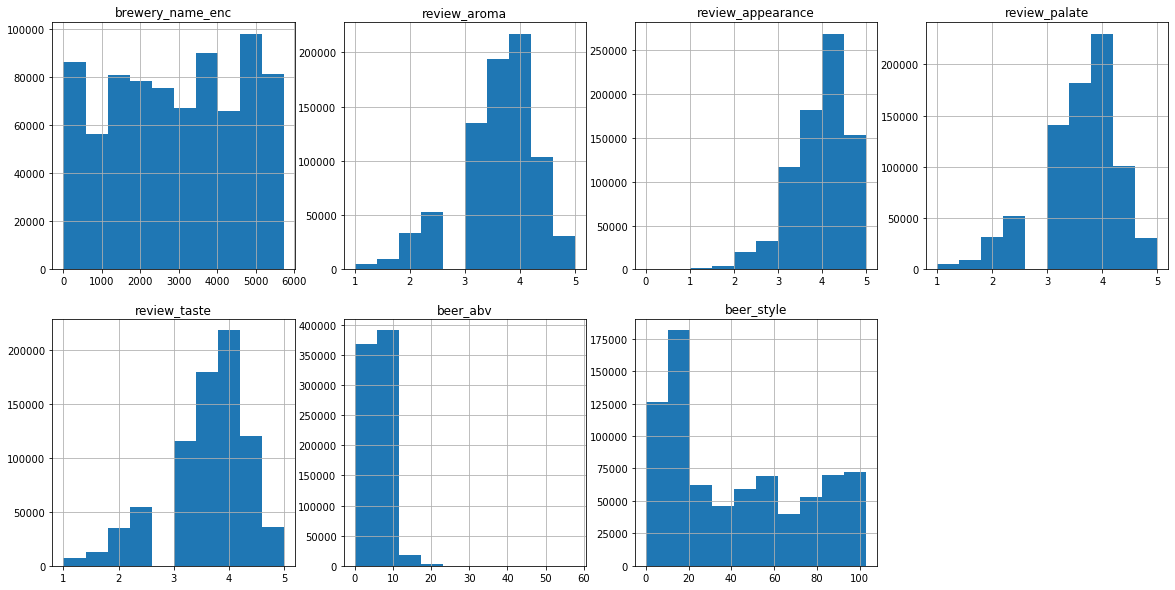

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    #fig.tight_layout()  # Improves appearance a bit.
    #fig.set_dpi(150)
    plt.show()
test = df_cleaned[['brewery_name_enc','review_aroma','review_appearance','review_palate','review_taste','beer_abv','beer_style']]
draw_histograms(test, test.columns, 2, 4)

#### 2.2.10.2 Violin Plots

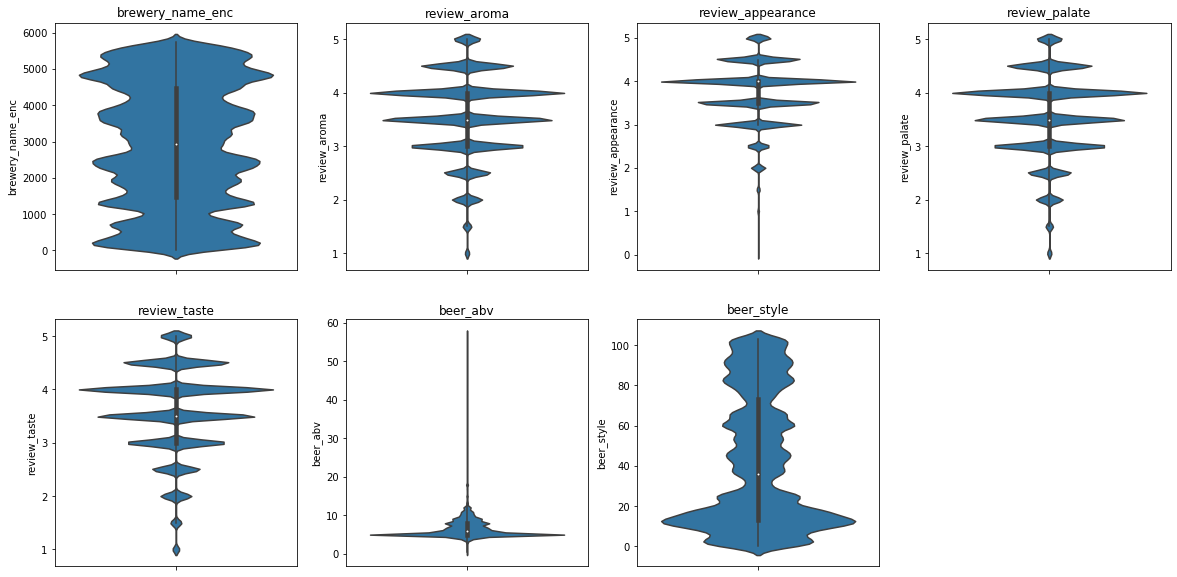

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
def draw_violin_plots(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.violinplot(y = df[var_name])
        ax.set_title(var_name)
    #fig.tight_layout()  # Improves appearance a bit.
    #fig.set_dpi(150)
    plt.show()
test = df_cleaned[['brewery_name_enc','review_aroma','review_appearance','review_palate','review_taste','beer_abv','beer_style']]
draw_violin_plots(test, test.columns, 2, 4)

## 2.3 Construct Data

In [21]:
# Downsample Dataset to assist with end to end process development
X_res = df_cleaned.copy()
y_res = X_res.pop('beer_style')
#X_res, y_res = RandomUnderSampler(random_state=8).fit_resample(X_res, y_res)
df_cleaned = pd.concat([X_res[['brewery_name_enc','review_aroma','review_appearance','review_palate','review_taste','beer_abv']], y_res], axis=1)
df_cleaned_csv = pd.concat([X_res[['brewery_name','review_aroma','review_appearance','review_palate','review_taste','beer_abv']], y_res], axis=1)
df_cleaned_csv.to_csv('../data/interim/beer_reviews.csv', index=False)
print('Dataframe (rows, columns): ', df_cleaned.shape)
# Print first 10 rows of dataframe
df_cleaned.head(10)

Dataframe (rows, columns):  (779578, 7)


,brewery_name_enc,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style
0,5438.000000,2.000000,2.500000,1.500000,1.500000,5.000000,65
1,5438.000000,2.500000,3.000000,3.000000,3.000000,6.200000,51
2,5438.000000,2.500000,3.000000,3.000000,3.000000,6.500000,59
3,5438.000000,3.000000,3.500000,2.500000,3.000000,5.000000,61
4,1480.000000,4.500000,4.000000,4.000000,4.500000,7.700000,9
5,1480.000000,3.500000,3.500000,3.000000,3.500000,4.700000,66
6,1480.000000,3.500000,3.500000,4.000000,4.000000,4.700000,66
7,1480.000000,2.500000,3.500000,2.000000,3.500000,4.700000,66
8,1480.000000,3.000000,3.500000,3.500000,4.000000,4.700000,66
9,1480.000000,3.500000,5.000000,4.000000,4.000000,4.700000,66


### 2.3.1 Scale Features

In [22]:
# Create a new dataframe with scaled features. This uses a custom function available in the dataprep pacakge
#scale_cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste','beer_abv']
#df_cleaned[scale_cols] = dataprep.scale_features(df_cleaned[scale_cols], MinMaxScaler())
df_cleaned.describe()

,brewery_name_enc,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style
count,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000,779578.000000
mean,2924.711331,3.571197,3.719639,3.577883,3.597017,6.637261,42.605962
std,1691.664689,0.761809,0.681744,0.755965,0.807797,2.253341,32.548031
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,1471.000000,3.000000,3.500000,3.000000,3.000000,5.000000,13.000000
50%,2935.000000,3.500000,4.000000,3.500000,3.500000,5.900000,36.000000
75%,4489.000000,4.000000,4.000000,4.000000,4.000000,8.000000,73.000000
max,5741.000000,5.000000,5.000000,5.000000,5.000000,57.700000,103.000000


### 2.3.2 Split dataset into Train, Validation and Test sets

In [23]:
# Split dataframe with cleaned features into train, validation and test datasets with 80/20 split.
X_train, y_train, X_val, y_val, X_test, y_test = datasets.split_sets_random(df_cleaned, target_name)

In [24]:
print("Train Dataframe (rows, columns): ", X_train.shape)
print("Validation Dataframe (rows, columns): ", X_val.shape)
print("Test Dataframe (rows, columns): ", X_test.shape)

Train Dataframe (rows, columns):  (467746, 6)
Validation Dataframe (rows, columns):  (155916, 6)
Test Dataframe (rows, columns):  (155916, 6)


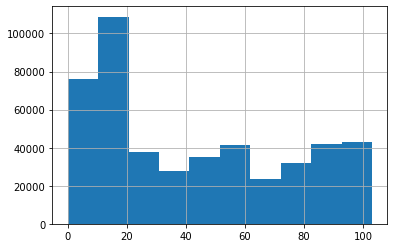

In [25]:
plt.rcParams["figure.figsize"] = (6,4)
y_train.hist()

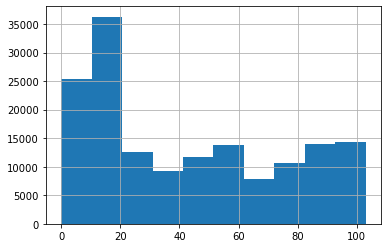

In [26]:
plt.rcParams["figure.figsize"] = (6,4)
y_val.hist()

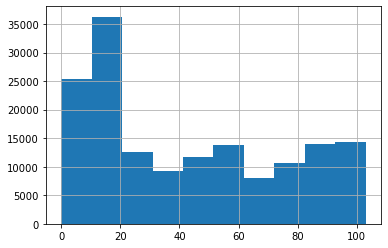

In [27]:
plt.rcParams["figure.figsize"] = (6,4)
y_test.hist()

>**Observations:**
>* Distribution of target variable consistent across all train, validation and test datasets and consistent with original dataset

### 2.3.3 Save datasets for modelling

In [28]:
datasets.save_sets(X_train, y_train, X_val, y_val, X_test, y_test)